# Unsupervised Learning Predict - Movie Recommender System Challenge
© Explore Data Science Academy

---
### Honour Code

We, **InfinityAI** {**#Team_NM3**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

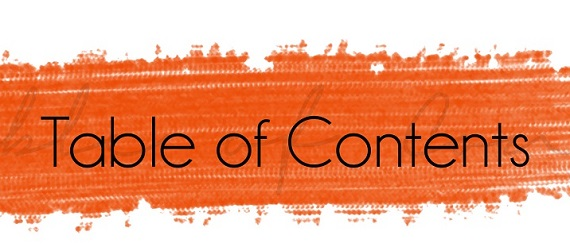

<a id="cont"></a>

## Table of Contents

#### Section 1: Enviroment Setup

<a href=#one>1.1 Python Package Setup</a>

<a href=#two>1.2 Comet  Initialization</a>

<a href=#three>1.3 Package Imports</a>

#### Section 2: Data

<a href=#five>2.1 Download of dataset</a>

<a href=#six>2.2 Basic Data Analysis</a>

#### Section 3: Exploratory Data Analysis

<a href=#seven>3.1 Explore user data</a>

<a href=#seven>3.2 Explore movie genre</a>

<a href=#seven>3.3 Explore movie data</a>

<a href=#seven>3.4 Explore imdb data</a>

<a href=#seven>3.5 Explore tags data</a>

<a href=#seven>3.6 Explore publishing years</a>


###  Section 4: Base Model Testing

<a href=#eight>4.1 Cross-Validation Testing</a>

<a href=#nine>4.2  Train-Test-Split</a>

<a href=#ten>4.3   Grid Search</a>

###  Section 5: Model Building

<a href=#twelve>5.1 Fit model to whole dataset</a>

<a href=#thirteen>5.2 Download CSV for Kaggle Competition</a>

<a href=#fourteen>5.3 Pickle model for use in Streamlit</a>

### Section 6:  Collaborative & Content Based Model

<a href=#fifteen>6.1 Collaborative Filtering - Approach I</a>

<a href=#sixteen>6.2 Content Based - Approach II</a>

### Section 7: Conclusion

### Section 8: References


# Introduction

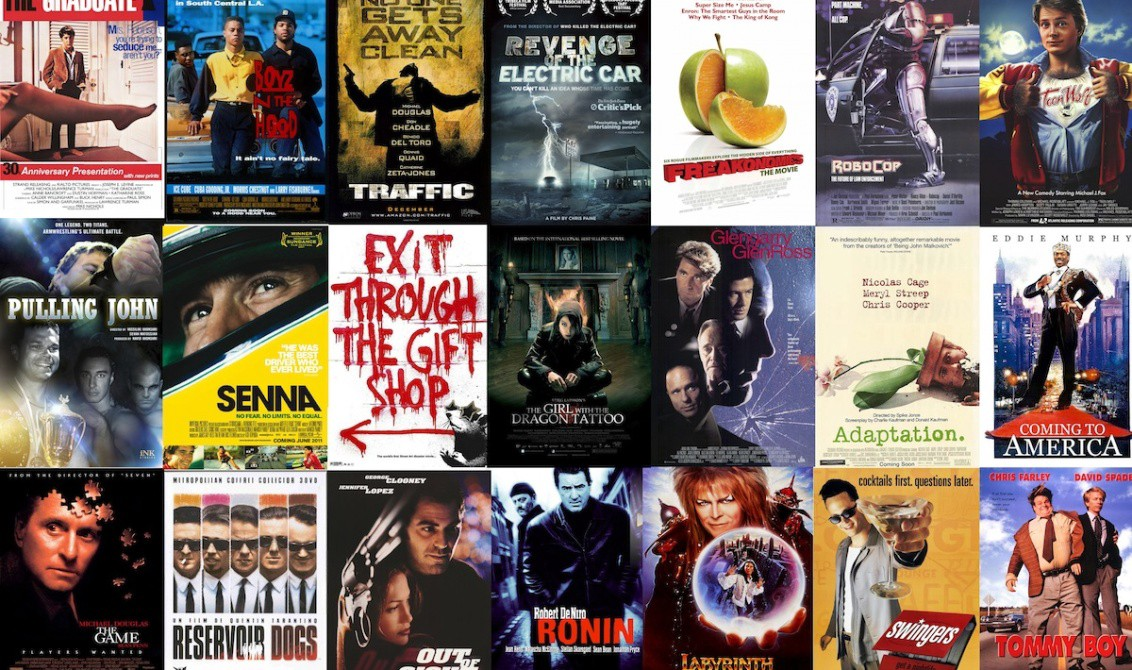

Movies have managed to enthrall audiences ever since one second clips of racing horses emerged in the 1890s to the introduction of sound in the 1920s to the birth of color in the 1930s to mainstream 3D Movies in the early 2010s. Around the world, movie industries have been blessed with creative geniuses in the form of directors, screenwriters, actors, sound designers and cinematographers.

Together with the rise in popularity of portable devices, capable of hosting streaming services, movies have ensured that people can stay glued to their favourites whether in transit or in the corners of their homes. 

However, the spread into a plethora of genres ranging from romance to comedy to science fiction to horror has created a new problem of information overload, where choice and decision-making for individuals has become quite challenging. 

In today’s technology driven world, there have been several attempts to solving this problem using recommender systems. These systems are basically a subclass of intelligent information filtering processes that provide suggestions for items that are most pertinent to a particular user. They are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. In the movie industry, recommender systems or algorithms can help viewers find great titles from tens of thousands of options. 

In this Notebook, the **Infinity AI** team identifies some insights into data that can be used for the development of a few recommender systems. The team explores eight datasets of more than 48000 movies and over 160000 users with up to 15 million of datapoints containing movie ratings, genres, keywords, and so on collected from Explore Ai Academy (EDSA) and the MovieLens datasets. Using these datasets, the team attempts to answer various questions about movies. Delivering an accurate and robust solution to this challenge has immense economic potential for industry clients, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity. 

**Infinity AI** is a group of seven Data Science students from the July 2022 cohort of the EDSA's **Accelerator Data Science** course. We are:

 > Josiah Aramide <br>
 > Bongani Mavuso <br>
 > Ndinannyi mukwevho <br>
 > Aniedi Oboho-Etuk <br>
 > Manoko Langa <br>
 > Tshepiso Padi <br>
 > Nsika Masondo <br>
 
 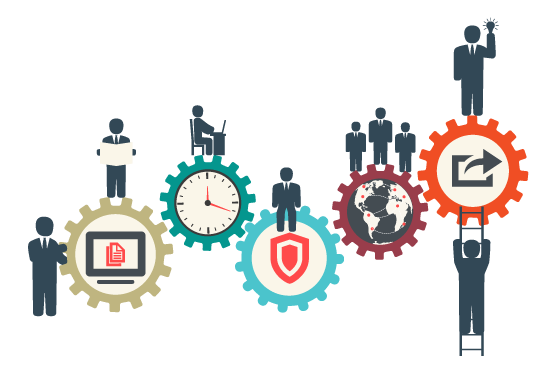

### Problem Statement

The client is determined to improve its recommender system service offering to targeted consumer categories based on their movie content rating. 

Data from the historical viewing experiences, available to the company contains some preference and similarity characteristics that can ensure accurate prediction of consumer behaviour. 

By constructing a recommendation algorithm based on content or collaborative filtering, **InfinityAI** team can develop a solution capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences. This solution can give the company access to immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.



### Objectives

**InfinityAI** seeks to achieve the following objectives for the project brief:

- 1. analyse the supplied data;
- 2. identify underlying patterns and potential errors in the data and clean the existing data set;;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a recommendation algorithm based on content or collaborative filtering that is capable of capable of accurately predicting how a user will rate a movie they have not yet viewed;
- 5. evaluate the accuracy of the best machine learning model; and
- 6. explain the inner working of the model to a non-technical audience.

# Section 1: Enviroment Setup

Let's start by installing and importing required packages/libraries.

<a id="one"></a>
## 1.1 Python Package Installation
<a href=#cont>Back to Table of Contents</a>

To run this notebook, install the following root packages on your local machine:

- matplotlib
- nltk
- numpy
- pandas
- plotly
- scikit-learn
- seaborn
- surprise
- Comet

In [4]:
# --> uncomment these lines below if the dependent code cells do not run

#!pip install comet_ml # Comet installation for Jupyter Notebook/Collab
#!pip install git+https://github.com/microsoft/recommenders.git
#!pip install kneed # knee (/elbow) point detection for cluster optimization
#!pip install tf_slim
#!pip install downcast
##pip install scikit-surprise
!pip install ipython-autotime

 <a id="one"></a>
## 1.2 Comet Initialization
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Due to the way Comet ties into other Maching Learning packages automatically to track certain features, it is required to be one of the first packages imported at the top of the notebook.

In [ ]:
# Create an instance of Comet experiment with TeamNM3's API key
experiment = Experiment(
    api_key="RpnzF8DcMSor3mXqAfEQqsXjv",
    project_name="unsupervised-learning-predict",
    workspace="teamnm3",
)

 <a id="one"></a>
## 1.3 Importing Packages
<a class="anchor" id="1.2"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Below are the libraries and tools imported for use in this project. The libraries include:
   - **numpy**: for working with arrays,
   - **pandas**: for tansforming and manipulating data in tables,
   - **matplotlib**: for creating interactive visualisations,
   - **seaborn**: for making statistical graphs and plots,
   - **scikit-learn**: for machine learning and statistical modeling, and
   - **math**: for algebraic notations and calculations.

---

In [16]:
# Libraries for data loading, data manipulation and data visulisation 
# Import our regular old heroes 
import numpy as np
import pandas as pd
import datetime
import time
import re
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as pyo

from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error

# Additional packages
import warnings
from collections import OrderedDict
from datetime import date
#from comet_ml import Experiment

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

from surprise import (
    NMF,
    SVD,
    BaselineOnly,
    CoClustering,
    Dataset,
    KNNBasic,
    NormalPredictor,
    Reader,
    SlopeOne,
    SVDpp,
)
from surprise import accuracy
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

time: 4.66 ms (started: 2023-02-02 18:17:51 +00:00)


# Section 2: Data

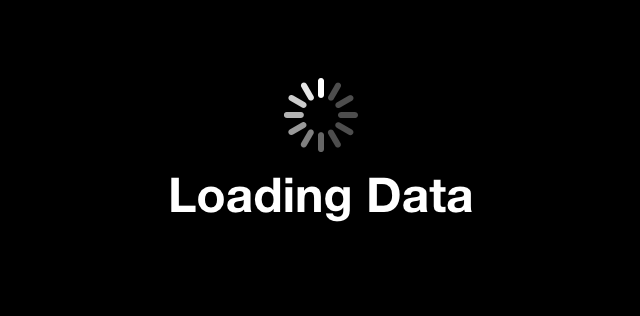

<a id="two"></a>
## 2.1 Download of dataset
<a class="anchor" id="1.2"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, data is loaded from **Kaggle** made available to **TeamNM3** by the client, **Explore-AI**. This involves reading the data from the `.csv` file format into a Pandas dataframe. The Pandas dataframe allows for easy views and manipulations of the data in the form of tables and can be combined with other python libraries like numpy for desirable results. |

---

In [17]:
# Import Data

# Kaggle base path
base_path = "/kaggle/input/edsa-movie-recommendation-predict/"

df_ratings = pd.read_csv(base_path + "train.csv")
df_movies = pd.read_csv(base_path + "movies.csv")
df_imdb = pd.read_csv(base_path + "imdb_data.csv")

df_genome_scores = pd.read_csv(base_path + "genome_scores.csv")
df_genome_tags = pd.read_csv(base_path + "genome_tags.csv")
df_links = pd.read_csv(base_path + "links.csv")
df_tags = pd.read_csv(base_path + "tags.csv")

df_test = pd.read_csv(base_path + "test.csv")
sample_submission = pd.read_csv(base_path + "sample_submission.csv")

time: 14.2 s (started: 2023-02-02 18:18:01 +00:00)


<a id="three"></a>
## 2.2 Basic Data Analysis 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section we perform a basic analysis of the data in the various CSVs to develop an understanding of the data we're able to work with. We conclude this basic data analysis by combining all the data into one dataframe and then continuing into a more in-depth analysis.

### Ratings DataFrame

We begin this basic data analysis by examining the ratings dataframe.

In [3]:
# Display top 5 rows of dataframe
df_ratings.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

In [4]:
# Gather information about the dataframe
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [5]:
# Check if dataframe as any null values
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

We then create a dataframe to display the count and percentage of each rating value in the dataset.

In [6]:
# Determining number of rows for each rating value
rows_rating = df_ratings["rating"].value_counts()
rows_df_rating = pd.DataFrame({"rating": rows_rating.index, "Rows": rows_rating.values})

# Determining percentage of rows for each rating value
percentage_rating = round(df_ratings["rating"].value_counts(normalize=True) * 100, 2)
percentage_df_rating = pd.DataFrame(
    {"rating": percentage_rating.index, "Percentage": percentage_rating.values}
)

# Joining row and percentage information
ratings_df_distribution = pd.merge(
    rows_df_rating, percentage_df_rating, on="rating", how="outer"
)
ratings_df_distribution.set_index("rating", inplace=True)
ratings_df_distribution.sort_index(axis=0)

Rows  Percentage
rating                     
0.5      157571        1.58
1.0      311213        3.11
1.5      159731        1.60
2.0      656821        6.57
2.5      505578        5.06
3.0     1959759       19.60
3.5     1270642       12.71
4.0     2652977       26.53
4.5      880516        8.81
5.0     1445230       14.45

In the dataframe above we can see that 4.0 is the most commonly score, with 26.53% of the movies in the dataframe assigned that score.

We visualize the data below:

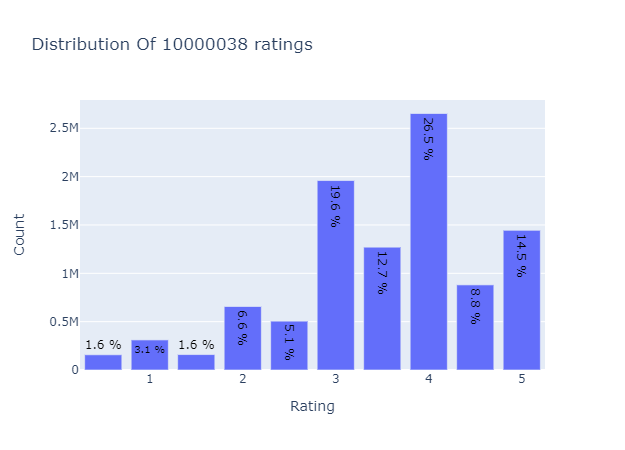

In [8]:
pyo.init_notebook_mode()
init_notebook_mode(connected=True)
data = df_ratings["rating"].value_counts().sort_index(ascending=False)

# Plot data
trace = go.Bar(
    x=data.index,
    text=["{:.1f} %".format(val) for val in (data.values / df_ratings.shape[0] * 100)],
    textposition="auto",
    textfont=dict(color="#000000"),
    y=data.values,
)

# Create layout
layout = dict(
    title="Distribution Of {} ratings".format(df_ratings.shape[0]),
    xaxis=dict(title="Rating"),
    yaxis=dict(title="Count"),
)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
pyo.iplot(fig)

we see half scores (0.5, 1.5, 2.5, 3.5 and 4.5) are less commonly used than integer score values. We don't know if this is because users prefer to rate movies with integer values or if it's because half scores were introduced after the original scoring system was already in use, leading to a decreased volume in a dataset with ratings from 1995. We quickly attempt to understand this further by investigating which years recorded half-score ratings:

In [3]:
# Create list of date objects
rating_date_list = [
    date.fromtimestamp(timestamp) for timestamp in list(df_ratings["timestamp"])
]

# Create year column
df_ratings["review_year"] = [date_item.year for date_item in rating_date_list]
years_with_half_scores = df_ratings[
    df_ratings["rating"].isin([0.5, 1.5, 2.5, 3.5, 4.5])
]["review_year"]
unique_years_with_half_scores = set(years_with_half_scores)
print(
    "There are {} years with half scores. \nThey are: {}.".format(
        len(unique_years_with_half_scores), sorted(list(unique_years_with_half_scores))
    )
)

There are 17 years with half scores. 
They are: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019].


We can see that before 2003, movies were not rated with half scores.

we'll check the percentage of half scores of the total for the ratings from 2003 onwards:

In [10]:
all_scores_after_2003 = len(df_ratings["rating"])
number_of_years_with_half_scores = len(years_with_half_scores)
print(
    "The percentage of reviews with half scores in the data from 2003 onwards is {:.2%}".format(
        number_of_years_with_half_scores / all_scores_after_2003
    )
)

The percentage of reviews with half scores in the data from 2003 onwards is 29.74%


We can see that half scores are not as popular as integer scores.


Now we examine the user data:

In [11]:
# Find the total number of users and movies and the number of unique users 
# and movies
unique_users = df_ratings["userId"].nunique()
total_users = len(df_ratings["userId"])
unique_movies = df_ratings["movieId"].nunique()
total_movies = len(df_ratings["movieId"])

# Display these values
print(
    "Total number of unique users: \t{} \n"
    "Total number of unique movies: \t{}\n"
    "Percentage of unique users: \t{:.2%}\n"
    "Percentage of unique movies: \t{:.2%}".format(
        unique_users,
        unique_movies,
        unique_users / total_users,
        unique_movies / total_movies,
    )
)

Total number of unique users: 	162541 
Total number of unique movies: 	48213
Percentage of unique users: 	1.63%
Percentage of unique movies: 	0.48%


The percentage of unique users and movies are both low.


We now move on to exploring the ratings dataframe.

**Summary of the basic analysis of the Ratings DataFrame**

The ratings dataframe consists of 10'000'038 rows and 4 columns (userId, movieID, rating and timestamp).

Ratings are from 0.5 to 5 in increments of 0.5. The majority of ratings were a 4, comprising of close to 27% of all the given data.

The data contains 162'541 unique users and 48'213 movies were rated.

Integer scores appear favoured over half scores, which were only introduced in 2003

**Movies DataFrame**

Here we perform a basic analysis of the movies dataframe. We begin this analysis by generating the head of the dataframe below:

In [12]:
# Display top 5 rows of dataframe
df_movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [13]:
# Gather information about the dataframe
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


Let's examine the number of unique values in the dataset:

In [14]:
# Information regarding number of unique values in each column:
print(
    "Total number of unique movie IDs: \t{}\n"
    "Total number of unique movie titles: \t{}\n"
    "Total number of unique movie genres: \t{}\n".format(
        df_movies["movieId"].nunique(),
        df_movies["title"].nunique(),
        df_movies["genres"].nunique(),
    )
)
print(
    "There are {} movies with the same name.".format(
        df_movies["movieId"].nunique() - df_movies["title"].nunique()
    )
)

Total number of unique movie IDs: 	62423
Total number of unique movie titles: 	62325
Total number of unique movie genres: 	1639

There are 98 movies with the same name.


There are fewer unique movie titles than unique IDs. We know that the difference between these two numbers is equal to the number of movies with the exact same name, which we see is 98. We will keep this in mind while building the recommender system.

We explore the genres column, first by finding the top 20 and lowest 20 genres by volume:

In [15]:
# Top 20 genres by volume:
df_genres = df_movies["genres"].value_counts()
df_genres.head(10)

Drama                   9056
Comedy                  5674
(no genres listed)      5062
Documentary             4731
Comedy|Drama            2386
Drama|Romance           2126
Horror                  1661
Comedy|Romance          1577
Comedy|Drama|Romance    1044
Drama|Thriller           933
Name: genres, dtype: int64

In [16]:
# Bottom 20 genres by volume:
df_genres = df_movies["genres"].value_counts()
df_genres.tail(20)

Action|Crime|Drama|Musical                          1
Action|Adventure|Animation|Comedy|Thriller          1
Crime|Drama|Fantasy|Horror|Thriller                 1
Action|Crime|Drama|Fantasy|Romance                  1
Action|Adventure|Animation|Drama|Sci-Fi             1
Drama|Fantasy|Horror|Mystery|Romance                1
Film-Noir|Thriller|War                              1
Comedy|Musical|Romance|War                          1
Children|Drama|Fantasy|Musical|Romance              1
Comedy|Fantasy|Horror|Sci-Fi|Thriller               1
Action|Adventure|Fantasy|Romance|IMAX               1
Crime|Drama|Thriller|Western                        1
Fantasy|Romance|Thriller|IMAX                       1
Adventure|Fantasy|Horror|Romance|Sci-Fi|Thriller    1
Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX     1
Action|Adventure|Crime|Fantasy                      1
Drama|Film-Noir|Musical|Thriller                    1
Action|Drama|Horror|Mystery                         1
Adventure|Comedy|Sci-Fi|Thri

We can see that the top genres by volume only have one or two genre types, whereas the bottom genres consist of multiple genres

**Summary of the basic analysis of the Movies DataFrame**

The movies dataframe contains 62'423 rows and 3 columns (movieId, title and genres). 98 of the rows have duplicate titles. 1'639 unique genres are listed, which includes combination genres. 5062 movies do not have a genre listed and 3 most popular genres are: Drama, Comedy and Documentary.

Next we move to the IMBD dataset.

**IMDB Data**

Here we explore the IMBD data to learn more about the content of the movies and the people who worked on them.

We begin by examining the dataframe.

In [17]:
# Display top 5 rows of dataframe
df_imdb.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion

In [18]:
# Gather information about the dataframe
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


Here we see that there are only 27277 movies in this dataframe, which is less than the 48213 movies in the ratings dataframe.

Next we check for missing data:

In [19]:
# Find percentage of missing values in each column
columns = df_imdb.columns
percent_missing_values = df_imdb.isnull().sum() / len(df_imdb.index) * 100
df_missing_values = pd.DataFrame(
    {"column_name": columns, "percent_missing": percent_missing_values}
)
df_missing_values

column_name  percent_missing
movieId              movieId         0.000000
title_cast        title_cast        36.908864
director            director        36.197668
runtime              runtime        44.317765
budget                budget        71.016937
plot_keywords  plot_keywords        40.611482

Here we see many columns are missing data.

Next we examine the number of unique items in each column, keeping in mind that all columns except for the movie ID column is missing data:

In [20]:
# Information regarding number of unique values in certain column:
print(
    "Total number of unique movie IDs: \t{}\n"
    "Total number of unique title casts: \t{}\n"
    "Total number of unique directors: \t{}\n"
    "Total number of unique plot keywords: \t{}".format(
        df_imdb["movieId"].nunique(),
        df_imdb["title_cast"].nunique(),
        df_imdb["director"].nunique(),
        df_imdb["plot_keywords"].nunique(),
    )
)

Total number of unique movie IDs: 	27278
Total number of unique title casts: 	17143
Total number of unique directors: 	11786
Total number of unique plot keywords: 	16008


Next we check the dataframe for duplicated movies:

In [21]:
df_imdb[df_imdb["movieId"].duplicated()]

Empty DataFrame
Columns: [movieId, title_cast, director, runtime, budget, plot_keywords]
Index: []

let's examine the most common cast members, directors, and plot keywords by volume in the dataset.

In [22]:
# Top 5 title cast members by volume:
df_cast = df_imdb["title_cast"].value_counts()
df_cast.head()

Louis C.K.                 5
Patton Oswalt              5
Naomi Kawase|Uno Kawase    4
Jim Jefferies              4
Eddie Izzard               4
Name: title_cast, dtype: int64

In [23]:
# Top 5 directors by volume:
df_directors = df_imdb["director"].value_counts()
df_directors.head()

See full summary       28
Woody Allen            26
Luc Besson             26
Stephen King           24
William Shakespeare    19
Name: director, dtype: int64

In [24]:
# Top 5 plot keywords by volume:
df_keywords = df_imdb["plot_keywords"].value_counts()
df_keywords.head()

Documentary                         19
f rated                             16
Action                              16
Comedy                              12
stand up special|stand up comedy     9
Name: plot_keywords, dtype: int64

**Summary of the basic analysis of the IMDB DataFrame**

The IMDB Dataframe has 27'278 rows and 6 columns (movieId, title_cast, director, runtime, budget and plot_keywords). MovieId is the only column that doesn't have any null values. All the other columns have at least 36% of missing values, with the budget column having the hightest percentage of null values at 71%. No movieId's are duplicated.

Luc Besson, Woody Allen and Stephen King are the 3 directors that appear most often in this dataset.

The most popular plot keywords are "documentary", "action", and "f rated".

**Genome Scores DataFrame**

Here we explore the genome scores data. This dataset contains scores that measure the relevance of a tag to a movie.

In [25]:
# Display top 5 rows of dataframe
df_genome_scores.head()

movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075

In [26]:
# Gather information about the dataframe
df_genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [27]:
# Information regarding number of unique values in each column:
print(
    "Total number of unique movie IDs: \t" + str(df_genome_scores["movieId"].nunique())
)
print("Total number of unique tag IDs: \t" + str(df_genome_scores["tagId"].nunique()))

Total number of unique movie IDs: 	13816
Total number of unique tag IDs: 	1128


**Summary of the basic analysis of the Genome Scores DataFrame**

The Genome Scores Dataframe has 15'584'448 rows and 3 columns (movieId, tagId and relevance). There are 13'816 unique movie ids and 1'128 unique tag ids.

**Genome Tags DataFrame**

Here we explore the tag data. These tags are assigned by a user.

In [28]:
# Display top 5 rows of dataframe
df_genome_tags.head()

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

In [29]:
# Gather information about the dataframe
df_genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [30]:
# Information regarding number of unique values in each column:
print("Total number of unique Tags: \t\t" + str(df_genome_tags["tag"].nunique()))
print("Total number of unique Tag IDs: \t" + str(df_genome_tags["tagId"].nunique()))

Total number of unique Tags: 		1128
Total number of unique Tag IDs: 	1128


**Summary of the basic analysis of the Genome Tags DataFrame**

The Genome Tags Dataframe has 1'128 rows and 2 columns (tagId and tag). All values are unique.

**Links DataFrame**

Here we explore the links dataframe. From Kaggle, this data serves as a link between a MovieLens ID and the IMDB and TMDB IDs associated with it

In [31]:
# Display top 5 rows of dataframe
df_links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [32]:
# Gather information about the dataframe
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [33]:
print("Total number of unique Movie Ids: \t" + str(df_links["movieId"].nunique()))
print("Total number of unique IMDB Ids: \t" + str(df_links["imdbId"].nunique()))
print("Total number of unique TMDB Ids: \t" + str(df_links["tmdbId"].nunique()))

Total number of unique Movie Ids: 	62423
Total number of unique IMDB Ids: 	62423
Total number of unique TMDB Ids: 	62281


In [34]:
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [35]:
# Check how many tmdb IDs are duplicated:
df_tmdb = df_links[df_links["tmdbId"].duplicated()]
tmdb_total = df_tmdb["tmdbId"].value_counts().sum()
print("Total number of tmdb Ids duplicated: \t" + str(tmdb_total))

Total number of tmdb Ids duplicated: 	35


**Summary of the Links DataFrame**

The links dataframe has 62'423 rows and 3 columns (movieId, imdbId and tmdbId). There are 62'423 unique movie and imdb IDs, which correspond with the number of rows in the dataframe. 107 of the tmdbId's are null values and 35 values are also dupclicates.

**Test and sample submission Data**

Here we briefly explore the data provided by Kaggle that users use for submissions.

In [36]:
# Display top 5 rows of dataframe
df_test.head()

userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318

In [37]:
# Gather information about the dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [38]:
# Display top 5 rows of dataframe
sample_submission.head()

Id  rating
0  1_2011     1.0
1  1_4144     1.0
2  1_5767     1.0
3  1_6711     1.0
4  1_7318     1.0

In [39]:
# Gather information about the dataframe
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   rating  float64
dtypes: float64(1), object(1)
memory usage: 76.3+ MB


In [40]:
sample_submission[sample_submission["Id"].duplicated()]

Empty DataFrame
Columns: [Id, rating]
Index: []

**Summary of the test and sample submission Data**

Both dataframes have 5'000'019 and no IDs are ducplicated.

# Section 3: Exploratory Data Analysis

<a id="three"></a>
## 3.1 Exploring user data  
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section we aim to explore the data specific to the users who contributed ratings.

We start this EDA by generating summary statistics for the rating values:

In [41]:
# Generate summary statistics
summary_statistics = df_ratings[["rating"]].describe().round(2)
summary_statistics

rating
count  10000038.00
mean          3.53
std           1.06
min           0.50
25%           3.00
50%           3.50
75%           4.00
max           5.00

We see that the average is 3.53, which seems sensible for movie reviews with a maximum score of 5 and a minimum score of 0.5.

We find the number of times a user rated a movie

In [42]:
# To find the number of times a user rated a movie, we create a data frame with the count by userId
df_user = pd.DataFrame(
    df_ratings['userId'].value_counts()).reset_index()
df_user.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
df_user.head()

userId  count
0   72315  12952
1   80974   3680
2  137293   3588
3   33844   3208
4   20055   3050

We now aggregate user data by user IDs to get the average ratings.

In [43]:
df_aggregated = (
    df_ratings[["userId", "rating"]].groupby("userId").agg(["count", "mean"])
)
df_aggregated.head(5)

rating          
        count      mean
userId                 
1          28  3.910714
2          72  3.416667
3         251  3.691235
4          89  3.308989
5          35  3.885714

We now group users in ranges and visualize the results

In [44]:
# Grouping the users within a certain range aided us in determining the common userId's and the new ones.
group_one = df_user.loc[(df_user['count'] > 0) & 
            (df_user['count'] < 50),
            'userId'].value_counts().sum()
group_two = df_user.loc[(df_user['count'] >= 50) & 
            (df_user['count'] < 500),
            'userId'].value_counts().sum()
group_three = df_user.loc[(df_user['count'] >= 500) & 
            (df_user['count'] < 1000),
            'userId'].value_counts().sum()
group_four = df_user.loc[(df_user['count'] >= 1000) & 
            (df_user['count'] < 1500),
            'userId'].value_counts().sum()
group_five = df_user.loc[(df_user['count'] >= 1500),
            'userId'].value_counts().sum()

Visualize the results

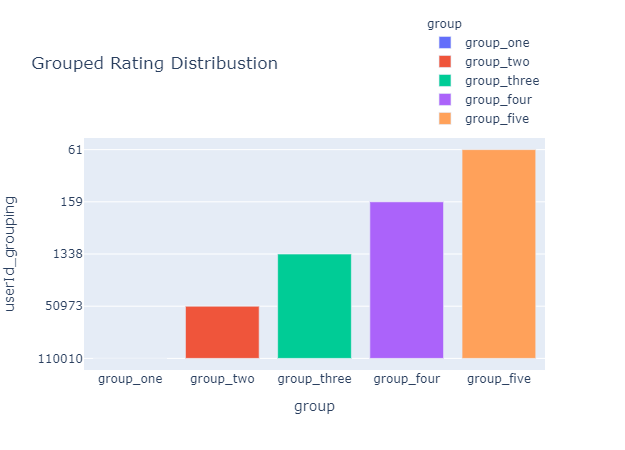

group userId_grouping            explanation
0    group_one          110010       between 1 and 50
1    group_two           50973     between 50 and 500
2  group_three            1338   between 500 and 1000
3   group_four             159  between 1000 and 1500
4   group_five              61      greater than 1500

In [49]:
# To give us insight in the spread, we used figures to determine the spread.
trial_error = np.array([['group_one', group_one,
                         'between 1 and 50'],
                        ['group_two', group_two,
                         'between 50 and 500'],
                        ['group_three', group_three,
                         'between 500 and 1000'],
                        ['group_four', group_four,
                         'between 1000 and 1500'],
                        ['group_five', group_five,
                         'greater than 1500']])
df_trial_error = pd.DataFrame({'group': trial_error[:, 0],
                               'userId_grouping': trial_error[:, 1],
                               'explanation': trial_error[:, 2]})
fig = px.bar(df_trial_error,
             x=df_trial_error["group"],
             y=df_trial_error["userId_grouping"],
             color=df_trial_error["group"],
             title='Grouped Rating Distribustion')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()
df_trial_error

The user Id's are grouped by the rating counts in a grouping range illustrated in the DataFrame above. In the Grouped Rating Distribution bar graph, it is visually displayed that there is unequal distribution. The distribution is skewed to the left, with the majority of the user ids in the rating count range between 1 and 50. At the same time, the last group has only a value count of 61, which is a significant difference from group one with a value count of 110 010.

In [50]:
def user_ratings_count(df, n):
    plt.figure(figsize=(14,7))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    plt.show()

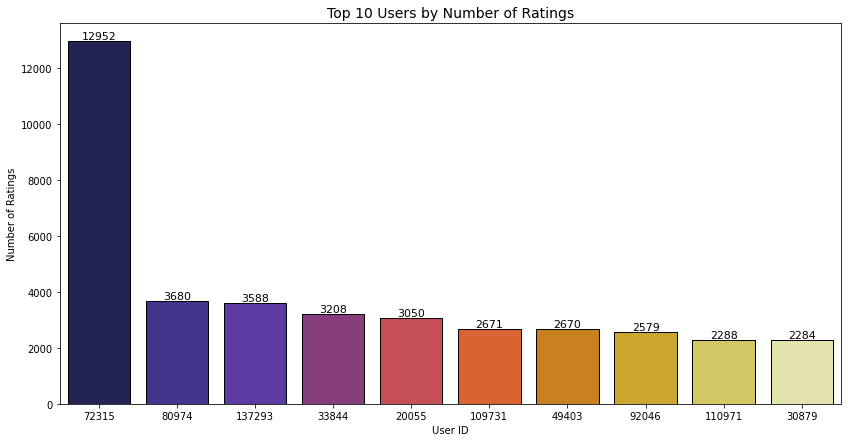

In [51]:
user_ratings_count(df_ratings,10)

From the graph above we can see there is one outlier with close to thirteen thousand reviews.

Filtering out user 72315 because his/her number of raings is too extreme and he/she is an oulier

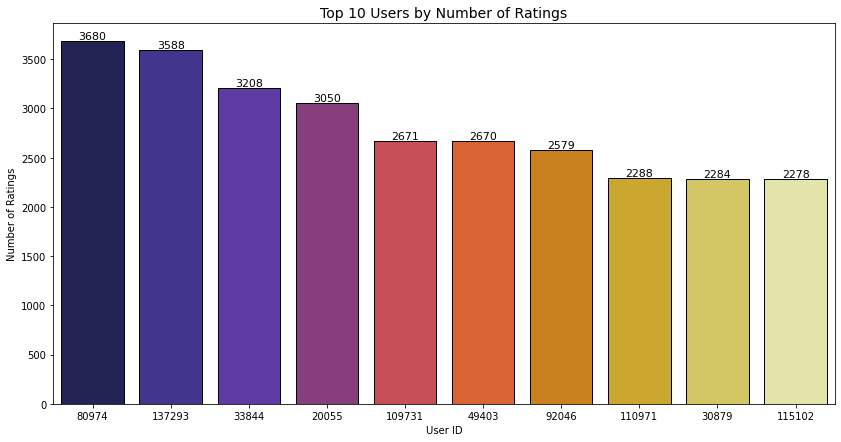

In [52]:
user_ratings_count(df_ratings[df_ratings['userId'] !=72315],10)

<a id="three"></a>
## 3.2 Exploring movie genre  
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [53]:
genres = pd.DataFrame(df_movies['genres'].
                      str.split("|").
                      tolist(),
                      index=df_movies['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']
genres.head()

movieId      Genre
0        1  Adventure
1        1  Animation
2        1   Children
3        1     Comedy
4        1    Fantasy

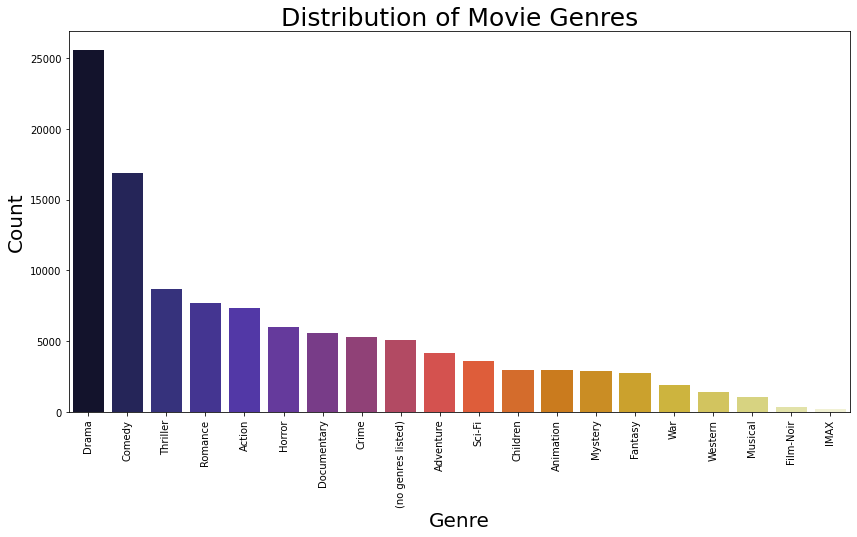

In [54]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre',
              data=genres,
              palette='CMRmap',
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

We can see that the top 3 most popular movie genres include drama, comedy and thriller.

<a id="three"></a>
## 3.3 Exploring movie data  
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [55]:
# Merging ratings with movies data

movies=pd.merge(df_ratings, df_movies,on='movieId',how='inner')
movies.head()

userId  movieId  rating   timestamp  review_year             title  \
0    5163    57669     4.0  1518349992         2018  In Bruges (2008)   
1   87388    57669     3.5  1237455297         2009  In Bruges (2008)   
2  137050    57669     4.0  1425631854         2015  In Bruges (2008)   
3  120490    57669     4.5  1408228517         2014  In Bruges (2008)   
4   50616    57669     4.5  1446941640         2015  In Bruges (2008)   

                        genres  
0  Comedy|Crime|Drama|Thriller  
1  Comedy|Crime|Drama|Thriller  
2  Comedy|Crime|Drama|Thriller  
3  Comedy|Crime|Drama|Thriller  
4  Comedy|Crime|Drama|Thriller

In [56]:
# Merging movies and imdb data

full_movies = pd.merge(movies,df_imdb,on='movieId',how='inner')
full_movies.head()

userId  movieId  rating   timestamp  review_year             title  \
0    5163    57669     4.0  1518349992         2018  In Bruges (2008)   
1   87388    57669     3.5  1237455297         2009  In Bruges (2008)   
2  137050    57669     4.0  1425631854         2015  In Bruges (2008)   
3  120490    57669     4.5  1408228517         2014  In Bruges (2008)   
4   50616    57669     4.5  1446941640         2015  In Bruges (2008)   

                        genres  \
0  Comedy|Crime|Drama|Thriller   
1  Comedy|Crime|Drama|Thriller   
2  Comedy|Crime|Drama|Thriller   
3  Comedy|Crime|Drama|Thriller   
4  Comedy|Crime|Drama|Thriller   

                                          title_cast         director  \
0  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
1  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
2  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
3  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
4  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   

   runtime       budget              plot_keywords  
0    107.0  $15,000,000  dwarf|bruges|irish|hitman  
1    107.0  $15,000,000  dwarf|bruges|irish|hitman  
2    107.0  $15,000,000  dwarf|bruges|irish|hitman  
3    107.0  $15,000,000  dwarf|bruges|irish|hitman  
4    107.0  $15,000,000  dwarf|bruges|irish|hitman

In [57]:
def top_n_plot_by_ratings(df,column, n):
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel(column.title())
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=90)
    plt.show()

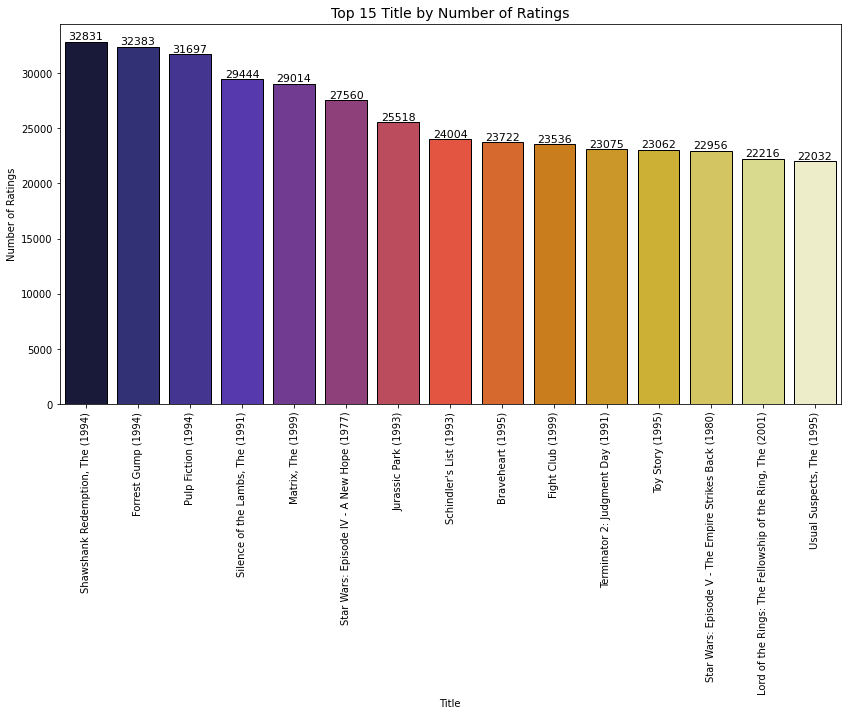

In [59]:
# top 15 most rated movies

top_n_plot_by_ratings(movies,'title',15)

In the Top 15 Title by Number of Ratings bar graph, all the movies are prior the year 2001, with 14 of them released in the 19th century.

The top three are Shawshank Redemption 1994, Forest Grump 1994 and Pulp Fiction 1994. All three movies fall under the popular drama genre and are American.

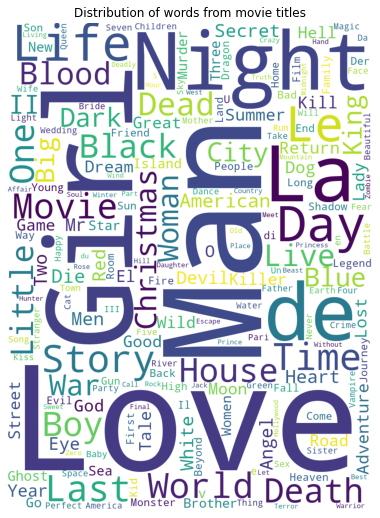

In [60]:
# Wordcloud of movie titles
movies_word = df_movies['title'] = df_movies['title'].astype('str')
movies_wordcloud = ' '.join(movies_word)
title_wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'White',
                            height = 1200,
                            width = 900).generate(movies_wordcloud)
plt.figure(figsize = (14,7), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Distribution of words from movie titles')
plt.tight_layout(pad=0)
plt.show()

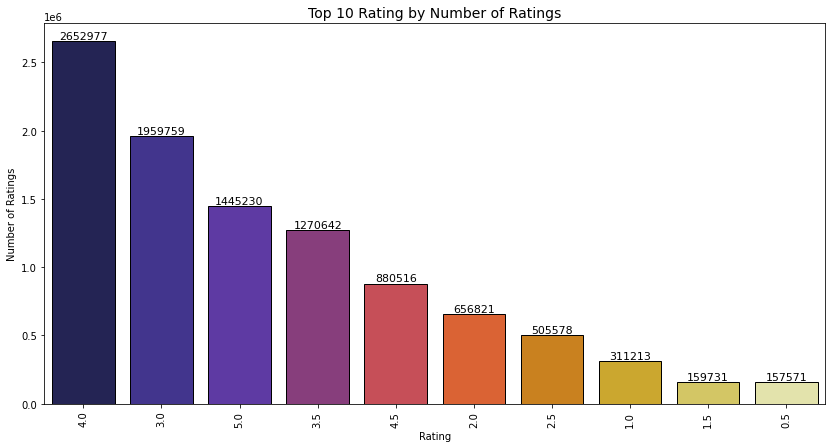

In [61]:
# Show the most rated rating

top_n_plot_by_ratings(movies,'rating',10)

The most common rating score that is given is 4.0, followed by 3.0. The least common score that is given by usrs is 0.5.

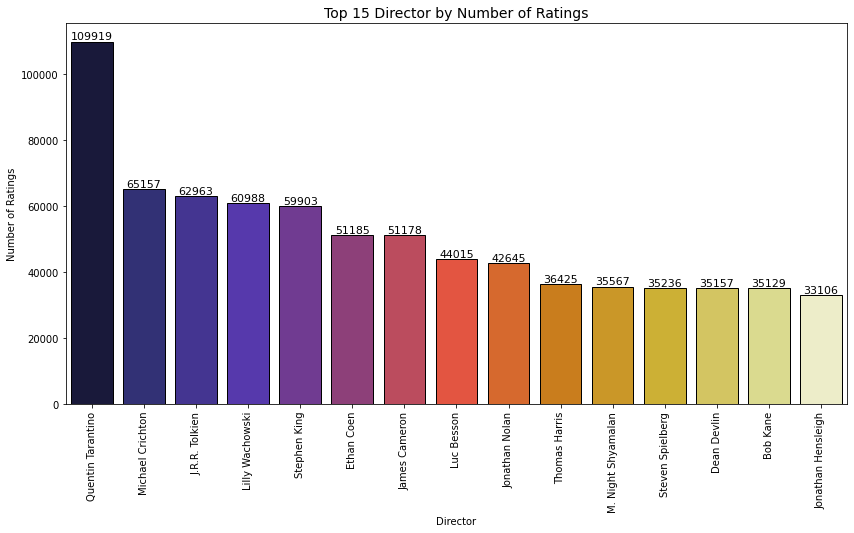

In [62]:
# show director's ratings

top_n_plot_by_ratings(full_movies,'director',15)

Quentin Tarantino is the top director of the number of ratings.

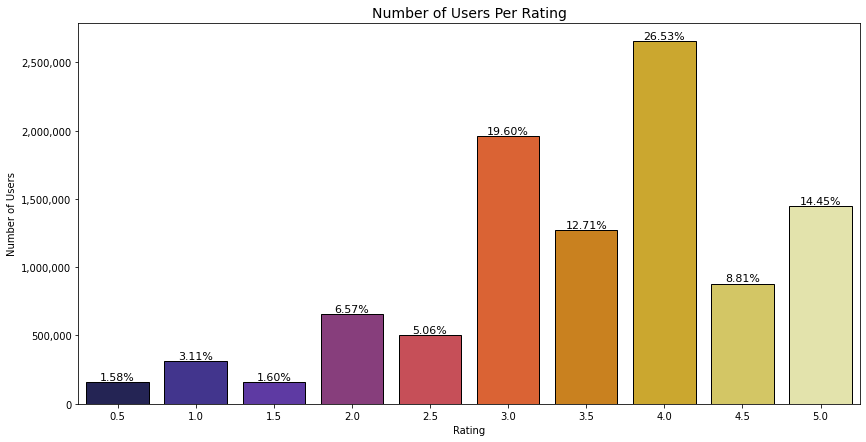

In [63]:
movieRatingDistGroup = df_ratings['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=movieRatingDistGroup, x='index', y='rating', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("Rating")
ax.set_ylabel('Number of Users')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(movieRatingDistGroup['rating'].sum())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+350, '{0:.2%}'.format(height/total), fontsize=11, ha="center", va='bottom')
plt.title('Number of Users Per Rating', fontsize=14)
plt.show()

Most of the users are weighted within the score range of 3.0 - 5.0, with the most users being weighted in the 4.0 score, accounting for 26.53% of the users.

<a id="three"></a>
## 3.4 Exploring imdb data  
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [64]:
def count_directors(df, count = 10):
    """
    Function to count the most common dircetors in a DataFrame:
    Parameters
    ----------
        df (DataFrame): input dataframe containing imdb metadata
        count (int): filter directors with fewer than count films
        
    Returns
    -------
        directors (DataFrame): output DataFrame
    Examples
    --------
        >>> df = pd.DataFrame({'imdbid':[0,1,2,3,4,5], 'director': [A,B,A,C,B]})
        >>> count_directors(df, count = 1)
            |index|director|count|
            |0|A|2|
            |1|B|2|
            |2|C|1|
    """
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)

In [65]:
def feature_count(df, column):
    plt.figure(figsize=(14,7))
    ax = sns.barplot(x = df[f'{column}'], y= df['count'], palette='brg')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

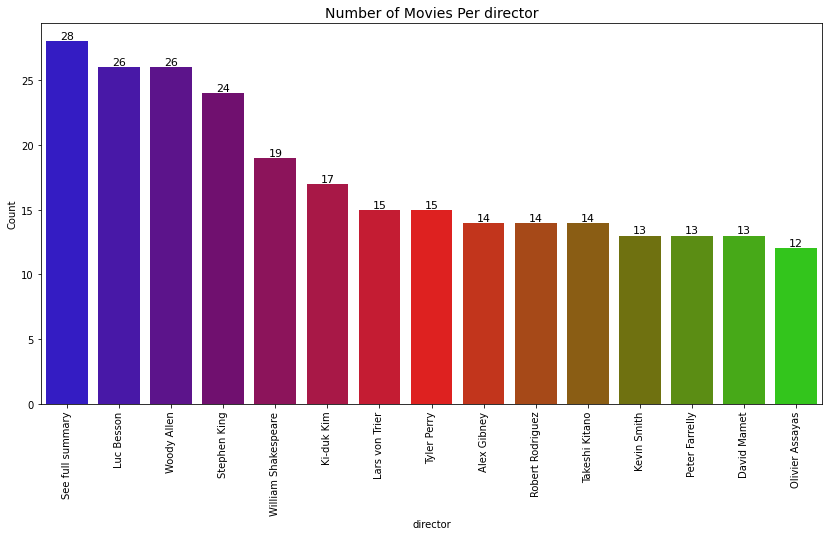

In [66]:
# shows number of movies per director

directors = count_directors(df_imdb)
feature_count(directors.head(15), 'director')

In the Number of Movies Per Director bar graph, the leading director has produced the most movies with a count of 28. Luc Besson and Woody Allen are tied with a value count of producing 26 movies and followed by Stephan King with 24. They are the only producers in the dataset with over 20 movie productions.

<a id="three"></a>
## 3.5 Exploring tags  
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

First we create a word cloud of tags:

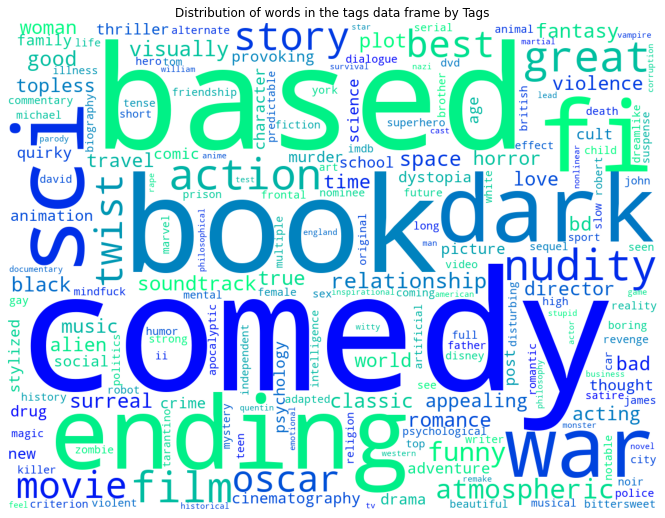

In [67]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_tags['tag']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=1200, height=900,
                      colormap='winter',
                      background_color='white',
                      stopwords=stopwords,collocations=False,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(14, 7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Distribution of words in the tags data frame by Tags')
plt.tight_layout(pad=0)

plt.show()

We can see from the word cloud that the most common words in tags were 'Comedy','book','War' and 'Dark'.

In [68]:
# creating a dataframe of genre and count of t

value_count = pd.DataFrame(df_tags['tag'].
                           value_counts()).reset_index()
value_count.rename(columns = {'index': 'genre', 'tag': 'count'},
                   inplace = True)

In [69]:
value_count.head()

genre  count
0       sci-fi   8330
1  atmospheric   6516
2       action   5907
3       comedy   5702
4      surreal   5326

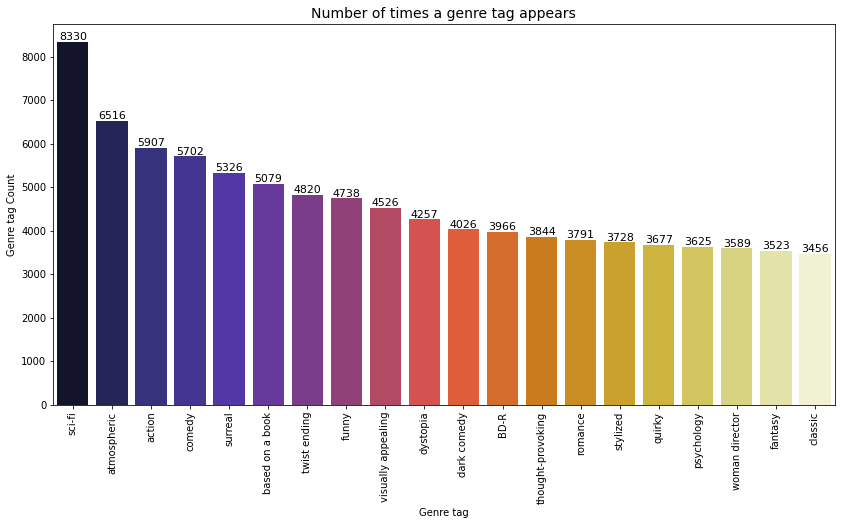

In [70]:
genre_count = value_count.head(20)
plt.figure(figsize=(14,7))
ax = sns.barplot(x = genre_count['genre'], y= genre_count['count'], palette='CMRmap')
for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.title('Number of times a genre tag appears', fontsize=14)
plt.xlabel('Genre tag')
plt.ylabel('Genre tag Count')
plt.xticks(rotation=90)
plt.show()

The most popular words in the world cloud include book, comedy, ending, based, dark and sci-fi.
The three most popular genres that appear in df_tags('tags') are sci-fi, atmospheric, and action.

<a id="three"></a>
## 3.6 Publishing years 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [71]:
dates = []
for title in df_movies['title']:
    if title[-1] == " ":
        year = title[-6: -2]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)
    else:
        year = title[-5: -1]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)

df_movies['Publish Year'] = dates

In [72]:

len(df_movies)

62423

In [73]:
len(df_movies[df_movies['Publish Year'] == 9999])

408

In [74]:
df_movies[(df_movies['Publish Year'] > 1888) &
          (df_movies['Publish Year'] < 2021)]

movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                            genres  Publish Year  
0      Adventure|Animation|Children|Comedy|Fantasy          1995  
1                       Adventure|Children|Fantasy          1995  
2                                   Comedy|Romance          1995  
3                             Comedy|Drama|Romance          1995  
4                                           Comedy          1995  
...                                            ...           ...  
62418                                        Drama          2018  
62419                                  Documentary          2001  
62420                                 Comedy|Drama          2018  
62421                           (no genres listed)          2001  
62422                       Action|Adventure|Drama          1962  

[62003 rows x 4 columns]

In [83]:
dataset = pd.DataFrame(df_movies['Publish Year'].
                       value_counts()).reset_index()
dataset.rename(columns={'index': 'year', 'Publish Year': 'count'},
               inplace=True)
dataset.head()

year  count
0  2015   2513
1  2016   2488
2  2014   2406
3  2017   2374
4  2013   2173

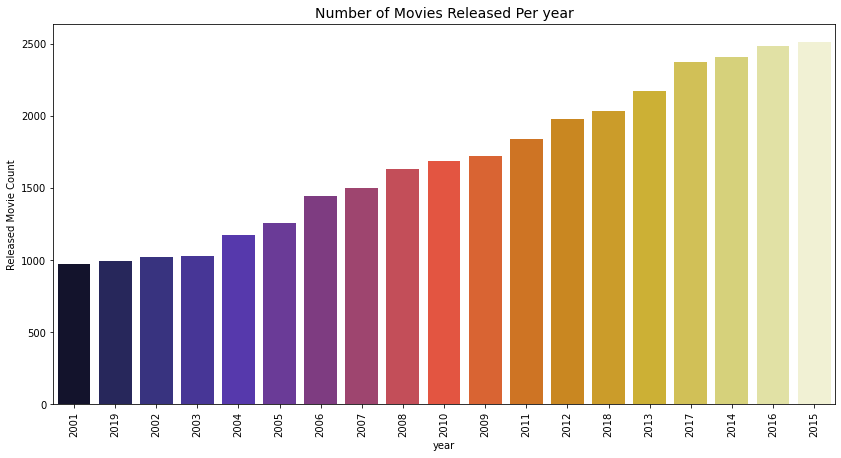

In [93]:
year_dataset = dataset[(dataset['year']>2000) & (dataset['year']<2021)].sort_values(by='count',ascending=True).head(50)
plt.figure(figsize=(14,7))
ax = sns.barplot(x = year_dataset['year'] , y= year_dataset['count'], order=year_dataset['year'], palette='CMRmap')
#for p in ax.patches:
#       ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.title('Number of Movies Released Per year', fontsize=14)
plt.xlabel('year') 
plt.ylabel('Released Movie Count')
plt.xticks(rotation=90)
plt.show()

In the Number of Movies Released Per year graph, we are able to visually see an major increase in movie releases in the 21st century.

# Section 4: Base Model testing

In [5]:
%load_ext autotime

time: 345 µs (started: 2023-02-02 16:33:55 +00:00)


With the Surprise library, the following algorithms will be used. RMSE is used as the accuracy metric for the predictions:

**NormalPredictor**

Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.A basic algorithm that does not do much work but that is still useful for comparing accuracies. This algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal. The prediction  $r^ui$
  is generated from a normal distribution  $N(μ^,σ^2)$
  where  $μ^$
  and  $σ^$
  are estimated from the training data using Maximum Likelihood Estimation:
            

**BaselineOnly**

A basic algorithm that does not do much work but that is still useful for comparing accuracies. This algorithm predicts the baseline estimate for a given user and item.
$r^ui=bui=μ+bu+bi$
 
If user  $u$
  is unknown, then the bias  $bu$
  is assumed to be zero. The same applies for item  $i$
  with  $bi$
 .

**KNNBasic**

A basic collaborative filtering algorithm.
This is an algorithms that is directly derived from a basic nearest neighbors approach. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

The actual number of neighbors that are aggregated to compute an estimation is necessarily less than or equal to  $k$
 . First, there might just not exist enough neighbors and second, the sets  $Nki(u)$
  and  $Nku(i)$
  only include neighbors for which the similarity measure is positive. It would make no sense to aggregate ratings from users (or items) that are negatively correlated. For a given prediction, the actual number of neighbors can be retrieved in the actual_k field of the details dictionary of the prediction. The prediction  $r^ui$
  is set as:
  
  
  
  depending on the user_based field of the sim_options parameter.

**SVD**

he famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize.

The prediction  $r^ui$
  is set as:  $r^ui=μ+bu+bi+qTipu $
 
If user  $u$
  is unknown, then the bias  $bu$
  and the factors  $pu$
  are assumed to be zero. The same applies for item  $i$
  with  $bi$
  and  $qi$
 .

To estimate all the unknown, we minimize the following regularized squared error:
$∑rui∈Rtrain(rui−r^ui)2+λ(b2i+b2u+∥qi∥2+∥pu∥2)$
 
The minimization is performed by a very straightforward stochastic gradient descent:
$bu←bu+γ(eui−λbu)$
 
$bi←bi+γ(eui−λbi)$
 
$pu←pu+γ(eui.qi−λpu)$
 
$qi←qi+γ(eui.pu−λqi)$
 
where  $eui=rui−r^ui$
 . These steps are performed over all the ratings of the trainset and repeated n_epochs times. Baselines are initialized to 0. User and item factors are randomly initialized according to a normal distribution, which can be tuned using the init_mean and init_std_dev parameters.

You also have control over the learning rate γ and the regularization term λ. Both can be different for each kind of parameter (see below). By default, learning rates are set to 0.005 and regularization terms are set to 0.02.

**SVDpp**

The SVD++ algorithm, an extension of SVD, takes into account implicit ratings. The prediction  $r^ui$
  is set as:
$r^ui=μ+bu+bi+qTi(pu+|Iu|−1/2∑j∈Iuyj)$
 
Where the  $yj$
  terms are a new set of item factors that capture implicit ratings. Here, an implicit rating describes the fact that a user  $u$
  rated an item  j
 , regardless of the rating value.

If user  $u$
  is unknown, then the bias  $bu$
  and the factors  pu
  are assumed to be zero. The same applies for item  $i$
  with  $bi$
 ,  $qi$
  and  $yi$
 .

Just as for SVD, the parameters are learned using a SGD on the regularized squared error objective.

Baselines are initialized to 0. User and item factors are randomly initialized according to a normal distribution, which can be tuned using the init_mean and init_std_dev parameters.

You have control over the learning rate γand the regularization term λ. Both can be different for each kind of parameter. By default, learning rates are set to 0.005 and regularization terms are set to 0.02.

**Nonnegative Matrix Factorization (NMF)**

NMF is a matrix factorization method where we constrain the matrices to be nonnegative. It is very similar with SVD.

Suppose we factorize a matrix  $X$
  into two matrices  $W$
  and  $H$
  so that  $X$
   ≈
   $WH$
 . There is no guarantee that we can recover the original matrix, so we will approximate it as best as we can. Now, suppose that  $X$
  is composed of m rows  x1
 ,  $x2$
 , ...  $xm$
  ,  $W$
  is composed of k rows  w1
 ,  w2
 , ...  $wk$
 ,  $H$
  is composed of m rows  h1
 ,  $h2$
 , ...  $hm$
  . Each row in  $X$
  can be considered a data point. For instance, in the case of decomposing images, each row in  $X$
  is a single image, and each column represents some feature.

**SlopeOne**

A simple yet accurate collaborative filtering algorithm.

**CoClustering**

Basically, users and items are assigned some clusters  $Cu$,$Ci$
 , and some co-clusters  $Cui$
 . The prediction  $r^ui$
  is set as:
$r^ui=Cui¯+(μu−Cu¯)+(μi−Ci¯)$
 
where  $Cui¯$
  is the average rating of co-cluster  $Cui$
 ,  $Cu$
  is the average rating of  $u$
 ’s cluster, and  $Ci¯$
  is the average rating of  $i$
 ’s cluster.

If the user is unknown, the prediction is  $r^ui=μi$
 . If the item is unknown, the prediction is  $r^ui=μu$
 . If both the user and the item are unknown, the prediction is  $r^ui=μ$
 .

<a id="three"></a>
## 4.1 Cross-Validation Testing 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Cross-Validation

In the case that the designer does not desire to use a validation set, or there is simply not enough data, a technique known as cross validation may be used. A common version of cross validation is known as K-fold cross validation: during the training process, some proportion of the training data, say 10%, is held back, and effectively used as a validation set while the model parameters are calcuated.

Here we perform cross-validation testing on five algorithms: SVD, NormalPredictor, BaseLineOnly, SlopeOne and CoClustering.

In [6]:
# Select sample size of 500 000 to test base models
df_model_testing = df_ratings.sample(n=500000)

reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df_model_testing[["userId", "movieId", "rating"]], reader)

time: 1.2 s (started: 2023-02-02 16:34:15 +00:00)


We built and test five different filtering models and compare their performance using a statistical measure known as the root mean squared error (RMSE), which determines the average squared difference between the estimated values and the actual value. A low RMSE value indicates high model accuracy.

Let us calculate the RMSEs for the five algorithms and display the scores in a dataframe.

In [7]:
benchmark = []

# Iterate over all algorithms
for algorithm in [
    SVD(),
    NMF(),
    NormalPredictor(),
    BaselineOnly(),
    SlopeOne(),
    CoClustering(),
]:

    # Perform cross validation
    results = cross_validate(algorithm, data, cv=5)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(
        pd.Series([str(algorithm).split(" ")[0].split(".")[-1]], index=["Algorithm"])
    )
    benchmark.append(tmp)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
time: 10min 54s (started: 2023-02-02 16:34:33 +00:00)


In [14]:
# Show summary dataframe
summary_results = (
    #pd.DataFrame(benchmark).set_index("Algorithm").sort_values("test_rmse")
    pd.DataFrame(benchmark).sort_values("test_rmse")
)
summary_results

test_rmse  test_mae   fit_time  test_time        Algorithm
3   0.930929  0.717986   2.355240   0.572300     BaselineOnly
0   0.933248  0.719875  30.644312   1.124073              SVD
5   1.063225  0.819611  22.005398   1.136153     CoClustering
1   1.085422  0.841861  44.013769   1.054522              NMF
4   1.172555  0.900024  14.177746   1.832962         SlopeOne
2   1.447904  1.152141   0.898371   1.227589  NormalPredictor

time: 14.2 ms (started: 2023-02-02 16:55:53 +00:00)


Now let us visualize our results using bar plot:

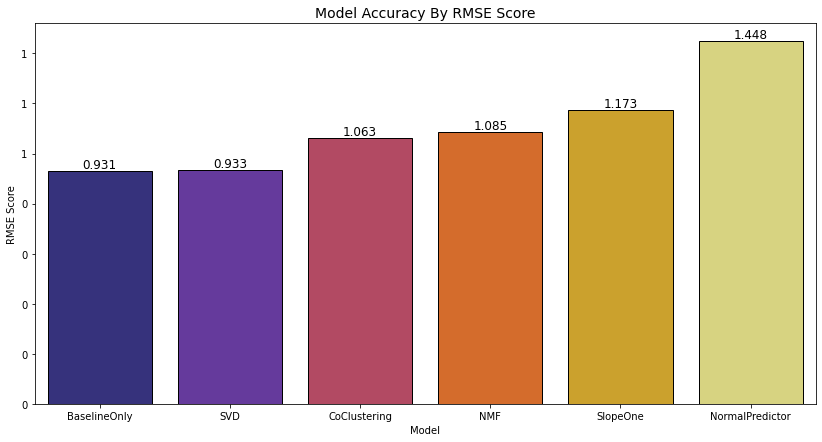

time: 291 ms (started: 2023-02-02 16:56:18 +00:00)


In [15]:
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=summary_results.sort_values(by='test_rmse'), x='Algorithm', y='test_rmse', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("Model")
ax.set_ylabel('RMSE Score')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
plt.title('Model Accuracy By RMSE Score', fontsize=14)
plt.show()

With a dataset of 500 000 rows the BaselineOnly model outperforms the SVD Model. The fit time of the BaselineOnly model is much better than the SVD model. Gridsearch

Next we perform split testing.

<a id="three"></a>
## 4.2 Train-Test-Split
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

**Train-Test-Split Testing of Top 2 Models**

Here we perform a train-test-split test on the BaselineOnly model and SVD model, the top two perfomers.

In [100]:
# Use all rows in Ratings dataframe
data_1 = Dataset.load_from_df(df_ratings[["userId", "movieId", "rating"]], reader)

# Test set is made of 25% of the ratings.
trainset, testset = train_test_split(data_1, test_size=0.25, random_state=27)

time: 48.9 s (started: 2023-02-01 17:09:36 +00:00)


Let's try to understand the four parameters we'll hand to the splitting function.

- `trainset` contains the features on which we will be training the model. 
- `test_size` is a value between 0 and 1: the proportion of our dataset that we want to be used as test data. Typically 0.25 (25%);
- `random_state` is an arbitrary value which, when set, ensures that the _random_ nature in which rows are picked to be in the test set is the same each time the split is carried out. In other words, the rows are picked at random, but we can ensure these random picks are repeatable by using the same value here. This makes it easier to assess model performance across iterations.

**BaselineOnly Model**

Test the BaseLineOnly model.

In [101]:
BaselineOnly_1 = BaselineOnly()

# Train the algorithm on the train set, and predict ratings for the test set
BaselineOnly_1.fit(trainset)
pred_Baseline = BaselineOnly_1.test(testset)

# Then compute RMSE
accuracy.rmse(pred_Baseline)

Estimating biases using als...
RMSE: 0.8677


0.86772772074836

time: 1min 26s (started: 2023-02-01 17:10:45 +00:00)


**SVD Model**

Test the SVD model.

In [102]:
SVD_1 = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
SVD_1.fit(trainset)
pred_SVD_1 = SVD_1.test(testset)

# Then compute RMSE
accuracy.rmse(pred_SVD_1)

RMSE: 0.8385


0.8385190241995959

time: 10min 46s (started: 2023-02-01 17:12:38 +00:00)


<a id="three"></a>
## 4.3 GridSearch
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

**GridSearch**


**What is GridSearchCV?**

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

GridSearchCV is a function that comes in Scikit-learn’s(or SK-learn) model_selection package.So an important point here to note is that we need to have the Scikit learn library installed on the computer. This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

Next we attempt to improve our model's performance by conducting a grid search on both the SVD and BaselineOnly models.

SVD Model

In [ ]:
# # API key to run experiment in Comet
experiment = Experiment(
    api_key="RpnzF8DcMSor3mXqAfEQqsXjv",
    project_name="unsupervised-learning-predict",
    workspace="teamnm3",
)

reader = Reader(rating_scale=(0.5, 5))
df_model_testing_3 = df_ratings.sample(n=10000)
data_3 = Dataset.load_from_df(
     df_model_testing_3[["userId", "movieId", "rating"]], reader
 )
param_grid = {
      "n_factors": [10, 20, 50, 100, 150, 200],
      "n_epochs": [15, 20, 25, 50, 75, 100],
      "lr_all": [0.005, 0.008, 0.001],
      "reg_all": [0.1, 0.3, 0.5],
 }

gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data_3)
algo = gs.best_estimator["rmse"]

# # best RMSE score
print(gs.best_score["rmse"])

# # combination of parameters that gave the best RMSE score
print(gs.best_params["rmse"])

experiment.log_dataset_hash(data_3)
experiment.log_parameters({"model_type": "SVD", "param_grid": param_grid})
experiment.log_metrics({"RMSE": gs.best_score["rmse"]})
experiment.end()

**BaselineOnly Model¶**

We repeat this process for the BaselineOnly model by running another GridSearchCV.

In [ ]:


# API key to run experiment in Comet
experiment = Experiment(
    api_key="RpnzF8DcMSor3mXqAfEQqsXjv",
    project_name="unsupervised-learning-predict",
    workspace="teamnm3",
)

param_grid = {
     "bsl_options": {
         "method": ["sgd"],
         "learning_rate": [0.004, 0.006, 0.008, 0.010],  # gamma
         "reg": [0.015, 0.020, 0.025],  # lambda 1 and 5
     }
 }
gs_baseline = GridSearchCV(
     BaselineOnly,
     param_grid,
     measures=["rmse"],
     cv=3,
     return_train_measures=True,
     n_jobs=1,
 )
gs_baseline.fit(data_3)

algo_baseline = gs_baseline.best_estimator["rmse"]

# # best RMSE score
print(gs_baseline.best_score["rmse"])

# # combination of parameters that gave the best RMSE score
print(gs_baseline.best_params["rmse"])

experiment.log_dataset_hash(data_3)
experiment.log_parameters({"model_type": "BaselineOnly", "param_grid": param_grid})
experiment.log_metrics({"RMSE": gs_baseline.best_score["rmse"]})

experiment.end()

# Section 5: Model Building

<a id="three"></a>
## 5.1 Fit model to whole dataset
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

We now switch to training our model on the entire train dataset.

In [104]:
# Use all rows in Ratings dataframe
data = Dataset.load_from_df(df_ratings[["userId", "movieId", "rating"]], reader)

# Test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25)

# Final Model Building
SVD_model = SVD(random_state=27)
trainset = data.build_full_trainset()
SVD_model.fit(trainset)

time: 14min 25s (started: 2023-02-01 17:28:31 +00:00)


<a id="three"></a>
## 5.2 Download CSV for Kaggle Competition
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [106]:
df_test["rating"] = df_test.apply(
    lambda x: SVD_model.predict(x["userId"], x["movieId"]).est, axis=1
)
df_test["Id"] = df_test.apply(lambda x: f"{x['userId']:.0f}_{x['movieId']:.0f}", axis=1)
submission = df_test[["Id", "rating"]]

time: 3min 21s (started: 2023-02-01 17:48:07 +00:00)


In [107]:
submission.to_csv("SVD_model.csv", index=False)

time: 11.6 s (started: 2023-02-01 17:52:59 +00:00)


<a id="three"></a>
## 5.3 Pickle model for use in Streamlit
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# Uncomment to pickle and download the final model
# pickle.dump(SVD_model, open("./SVD_model.pkl",'wb'))

# Section 6: Collaborative & Content Based Models

**Filtration Strategies for Movie Recommendation Systems**

Movie recommendation systems use a set of different filtration strategies and algorithms to help users find the most relevant films. The most popular categories of the ML algorithms used for movie recommendations include content-based filtering and collaborative filtering systems.

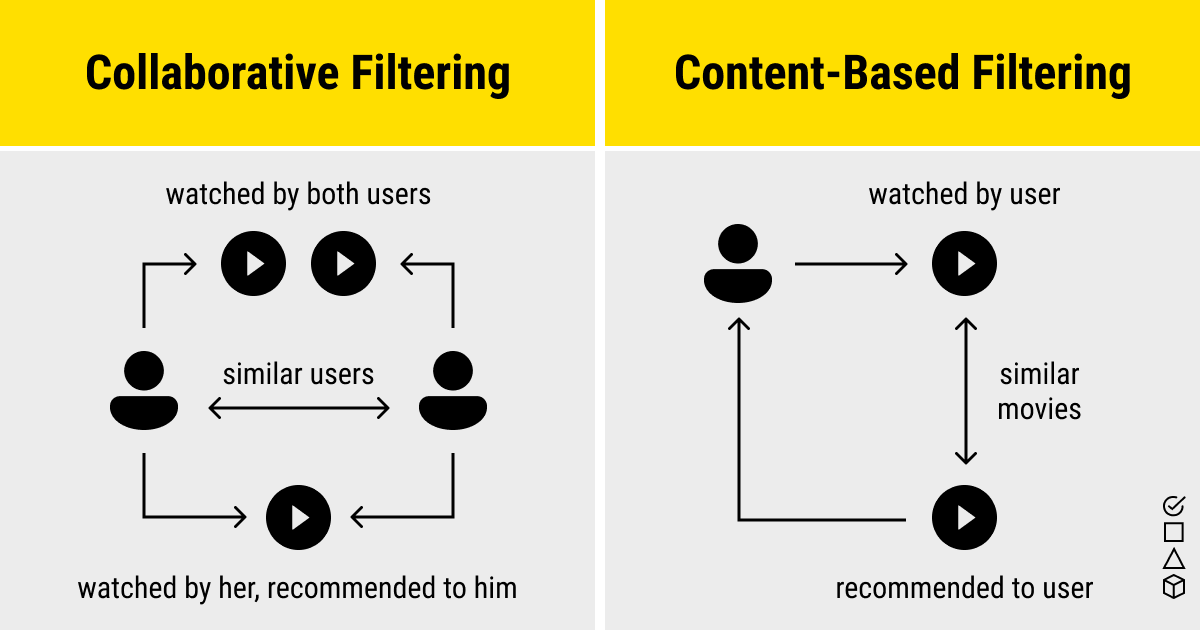

<a id="three"></a>
## 6.1 Collaborative Filtering: Approach I
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

— **Collaborative Filtering**

As the name suggests, this filtering strategy is based on the combination of the relevant user’s and other users’ behaviors. The system compares and contrasts these behaviors for the most optimal results. It’s a collaboration of the multiple users’ film preferences and behaviors.

What’s the mechanism behind this strategy? The core element in this movie recommendation system and the ML algorithm it’s built on is the history of all users in the database. Basically, collaborative filtering is based on the interaction of all users in the system with the items (movies). Thus, every user impacts the final outcome of this ML-based recommendation system, while content-based filtering depends strictly on the data from one user for its modeling.

Collaborative filtering algorithms are divided into two categories:

- **User-based collaborative filtering**. The idea is to look for similar patterns in movie preferences in the target user and other users in the database.
- **Item-based collaborative filtering**. The basic concept here is to look for similar items (movies) that target users rate or interact with.
The modern approach to the movie recommendation systems implies a mix of both strategies for the most gradual and explicit results.

In [109]:
# removing years in title
df_movies['title'] = df_movies.title.str.replace('(\(\d\d\d\d\))', '')
df_movies['title'] = df_movies['title'].apply(lambda x: x.strip())
df_movies.head()

movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                        genres  Publish Year  
0  Adventure|Animation|Children|Comedy|Fantasy          1995  
1                   Adventure|Children|Fantasy          1995  
2                               Comedy|Romance          1995  
3                         Comedy|Drama|Romance          1995  
4                                       Comedy          1995

time: 78.9 ms (started: 2023-02-01 17:54:37 +00:00)


We start this process by filtering the user and movie data by users that rated more than 60 movies.

In [110]:
# Convert IDs to int. Required for merging
df_ratings['movieId'] = df_ratings['movieId'].astype('int')
df_movies['movieId'] = df_movies['movieId'].astype('int')

# Merge df_rating and df_movies into your main dataframe
train_dat = df_ratings.merge(df_movies, on='movieId')

time: 3.67 s (started: 2023-02-01 17:54:47 +00:00)


In [111]:
# getting only the columns will need from merged data
df_train = train_dat[['userId','movieId','title','rating']]
df_train.head()

userId  movieId      title  rating
0    5163    57669  In Bruges     4.0
1   87388    57669  In Bruges     3.5
2  137050    57669  In Bruges     4.0
3  120490    57669  In Bruges     4.5
4   50616    57669  In Bruges     4.5

time: 615 ms (started: 2023-02-01 17:54:55 +00:00)


Convert rating into appropriate data types

In [112]:
df_train.rating = df_train.rating.astype(str).astype(float)

time: 4.85 s (started: 2023-02-01 17:55:01 +00:00)


show data

In [113]:

df_train.head()

userId  movieId      title  rating
0    5163    57669  In Bruges     4.0
1   87388    57669  In Bruges     3.5
2  137050    57669  In Bruges     4.0
3  120490    57669  In Bruges     4.5
4   50616    57669  In Bruges     4.5

time: 8.31 ms (started: 2023-02-01 17:55:09 +00:00)


Confirm the number of unique users, unique movies, and total ratings, and we will also calculate the average number of ratings provided by users:

In [114]:


n_users = df_train.userId.unique().shape[0]
n_movies = df_train.movieId.unique().shape[0]
n_ratings = len(df_train)
avg_ratings_per_user = n_ratings/n_users
print('Number of unique users: ', n_users)
print('Number of unique movies: ', n_movies)
print('Number of total ratings: ', n_ratings)
print('Average number of ratings per user: ', avg_ratings_per_user)

Number of unique users:  162541
Number of unique movies:  48213
Number of total ratings:  10000038
Average number of ratings per user:  61.52317261490947
time: 250 ms (started: 2023-02-01 17:55:21 +00:00)


To reduce the complexity and size of this dataset, we focus on the top one thousand most rated movies.

In [115]:


movieIndex = df_train.groupby("movieId").count().sort_values(by= \
"rating",ascending=False)[0:1000].index
rating2 = df_train[df_train.movieId.isin(movieIndex)]
rating2.count()

userId     6045885
movieId    6045885
title      6045885
rating     6045885
dtype: int64

time: 1.71 s (started: 2023-02-01 17:56:01 +00:00)


We will also take a sample of one thousand users at random and filter the dataset for just these users.

In [116]:


userIndex = rating2.groupby("userId").count().sort_values(by= \
"rating",ascending=False).sample(n=1000, random_state=2018).index
rating3 = rating2[rating2.userId.isin(userIndex)]
rating3.count()

userId     38510
movieId    38510
title      38510
rating     38510
dtype: int64

time: 980 ms (started: 2023-02-01 17:58:10 +00:00)


We also reindex movieID and userID to a range of 1 to 1,000 for our reduced dataset

In [117]:


movies = rating3.movieId.unique()
movies_df = pd.DataFrame(data=movies,columns=['originalMovieId'])
movies_df['newMovieId'] = movies_df.index+1
users = rating3.userId.unique()
users_df = pd.DataFrame(data=users,columns=['originalUserId'])
users_df['newUserId'] = users_df.index+1
rating3 = rating3.merge(movies_df,left_on='movieId', \
right_on='originalMovieId')
rating3.drop(labels='originalMovieId', axis=1, inplace=True)
rating3 = rating3.merge(users_df,left_on='userId', \
right_on='originalUserId')
rating3.drop(labels='originalUserId', axis=1, inplace=True)

time: 30.5 ms (started: 2023-02-01 17:58:15 +00:00)


Let’s calculate the number of unique users, unique movies, total ratings, and average number of ratings per user for our reduced dataset.

In [118]:


n_users = rating3.userId.unique().shape[0]
n_movies = rating3.movieId.unique().shape[0]
n_ratings = len(rating3)
avg_ratings_per_user = n_ratings/n_users
print('Number of unique users: ', n_users)
print('Number of unique movies: ', n_movies)
print('Number of total ratings: ', n_ratings)
print('Average number of ratings per user: ', avg_ratings_per_user)

Number of unique users:  1000
Number of unique movies:  1000
Number of total ratings:  38510
Average number of ratings per user:  38.51
time: 4.85 ms (started: 2023-02-01 17:58:22 +00:00)


In [119]:
rating3.head()

userId  movieId                                title  rating  newMovieId  \
0    8019    57669                            In Bruges     3.5           1   
1    8019    40815  Harry Potter and the Goblet of Fire     4.5          33   
2    8019     2291                  Edward Scissorhands     4.5          52   
3    8019        1                            Toy Story     4.0          72   
4    8019    30749                         Hotel Rwanda     3.0         109   

   newUserId  
0          1  
1          1  
2          1  
3          1  
4          1

time: 11.2 ms (started: 2023-02-01 17:58:27 +00:00)


We construct our utility matrix easily by using the pivot_table function

In [120]:


util_matrix = rating3.pivot_table(index=['newUserId'], 
                                       columns=['title'],
                                       values='rating') 
util_matrix.shape

(1000, 996)

time: 76.1 ms (started: 2023-02-01 17:58:32 +00:00)


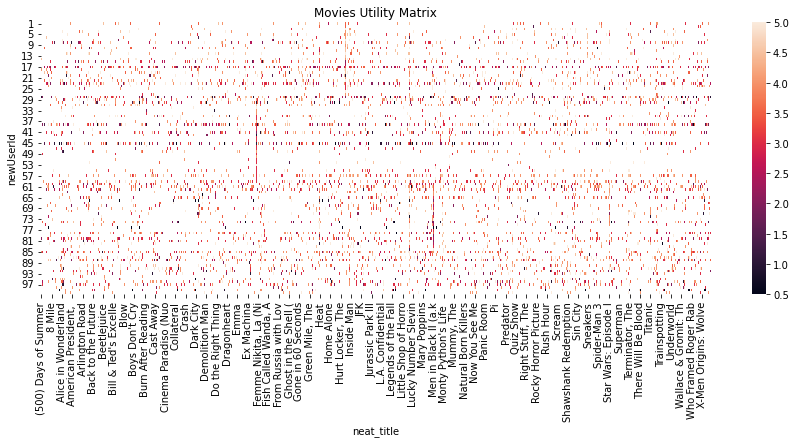

time: 2.01 s (started: 2023-02-01 17:58:37 +00:00)


In [121]:
# Create a neat version of the utility matrix to assist with plotting book titles 
rating3['neat_title'] = rating3['title'].apply(lambda x: x[:20])
util_matrix_neat = rating3.pivot_table(index=['newUserId'], 
                                            columns=['neat_title'],
                                            values='rating')

fig, ax = plt.subplots(figsize=(15,5))
# We select only the first 100 users for ease of computation and visualisation. 
# You can play around with this value to see more of the utility matrix. 
_ = sns.heatmap(util_matrix_neat[:100], annot=False, ax=ax).set_title('Movies Utility Matrix')

In [122]:
# Normalize each row (a given user's ratings) of the utility matrix
util_matrix_norm = util_matrix.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
# Fill Nan values with 0's, transpose matrix, and drop users with no ratings
util_matrix_norm.fillna(0, inplace=True)
util_matrix_norm = util_matrix_norm.T
util_matrix_norm = util_matrix_norm.loc[:, (util_matrix_norm != 0).any(axis=0)]
# Save the utility matrix in scipy's sparse matrix format
util_matrix_sparse = sp.sparse.csr_matrix(util_matrix_norm.values)

time: 712 ms (started: 2023-02-01 17:58:46 +00:00)


In [123]:
# Compute the similarity matrix using the cosine similarity metric
user_similarity = cosine_similarity(util_matrix_sparse.T)
# Save the matrix as a dataframe to allow for easier indexing  
user_sim_df = pd.DataFrame(user_similarity, 
                           index = util_matrix_norm.columns, 
                           columns = util_matrix_norm.columns)

# Review a small portion of the constructed similartiy matrix  
user_sim_df[:5]

newUserId       1         2         3         4         5         6    \
newUserId                                                               
1          1.000000  0.019205 -0.002474  0.014247 -0.030060  0.017735   
2          0.019205  1.000000  0.002287  0.022320  0.032455 -0.039452   
3         -0.002474  0.002287  1.000000  0.010012 -0.012331  0.002262   
4          0.014247  0.022320  0.010012  1.000000  0.032542 -0.002201   
5         -0.030060  0.032455 -0.012331  0.032542  1.000000  0.056915   

newUserId       7         8         9         10   ...       987  988  \
newUserId                                          ...                  
1         -0.058648  0.016795 -0.002961  0.090678  ... -0.008207  0.0   
2         -0.008947  0.012124  0.047501  0.024689  ...  0.000000  0.0   
3          0.011150  0.041559 -0.197523 -0.048752  ... -0.031407  0.0   
4          0.067076  0.056177 -0.002844  0.019512  ...  0.000000  0.0   
5          0.027129  0.043559  0.120380  0.030257  ...  0.000000  0.0   

newUserId       989       990       991  992  996  997  998  999  
newUserId                                                         
1          0.114893  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2          0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
3          0.000000  0.000000 -0.043700  0.0  0.0  0.0  0.0  0.0  
4          0.000000 -0.010326 -0.030447  0.0  0.0  0.0  0.0  0.0  
5          0.000000  0.033625  0.000000  0.0  0.0  0.0  0.0  0.0  

[5 rows x 989 columns]

time: 74.4 ms (started: 2023-02-01 17:58:52 +00:00)


#### Top-N Recommendations

In order to produce a list of top-N recommendations for collaborative filtering, the following simple algorithm can be followed: 

  1. Select an initial reference user to generate recommendations for. 
  2. Extract all the similarity values between the reference user and each other user in the similarity matrix.
  3. Sort the resulting similarity values in descending order, and select the $k$ most similar users based on these values.  
  5. For each selected user, collect their top-rated items. 
  6. Form a tally of which items are most popular across the $k$ similar users. Do this by counting how many times a top-rated item is common amongst the other users. 
  7. Sort the top-rated items according the the popularity tally. Return the top-N values as the result. 
    
  
We implement this algorithmic process in the function below:

In [124]:
def collab_generate_top_N_recommendations(user, N=10, k=20):
    # Cold-start problem - no ratings given by the reference user. 
    # With no further user data, we solve this by simply recommending
    # the top-N most popular movies in the item catalog. 
    if user not in user_sim_df.columns:
        return rating3.groupby('title').mean().sort_values(by='rating',
                                        ascending=False).index[:N].to_list()
    
    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    favorite_user_items = [] # <-- List of highest rated items gathered from the k users  
    most_common_favorites = {} # <-- Dictionary of highest rated items in common for the k users
    
    for i in sim_users:
        # Maximum rating given by the current user to an item 
        max_score = util_matrix_norm.loc[:, i].max()
        # Save the names of items maximally rated by the current user   
        favorite_user_items.append(util_matrix_norm[util_matrix_norm.loc[:, i]==max_score].index.tolist())
        
    # Loop over each user's favorite items and tally which ones are 
    # most popular overall.
    for item_collection in range(len(favorite_user_items)):
        for item in favorite_user_items[item_collection]: 
            if item in most_common_favorites:
                most_common_favorites[item] += 1
            else:
                most_common_favorites[item] = 1
    # Sort the overall most popular items and return the top-N instances
    sorted_list = sorted(most_common_favorites.items(), key=operator.itemgetter(1), reverse=True)[:N]
    top_N = [x[0] for x in sorted_list]
    return top_N

time: 3.98 ms (started: 2023-02-01 17:58:58 +00:00)


Our recommended list for user 41

In [125]:

collab_generate_top_N_recommendations(41)

['Braveheart',
 'Heat',
 'Godfather, The',
 'Trainspotting',
 'Casablanca',
 'Fight Club',
 'Monty Python and the Holy Grail',
 'Reservoir Dogs',
 'Wizard of Oz, The',
 'Star Wars: Episode IV - A New Hope']

time: 23.1 ms (started: 2023-02-01 17:59:06 +00:00)


In [126]:
# User 41's historical ratings. only 10 shown
rating3[rating3['newUserId'] == 41][:][['title','rating']].sort_values(by='rating', ascending=False)[:10]

title  rating
3114                                      Goodfellas     5.0
3029                                            Heat     5.0
3168                     Searching for Bobby Fischer     5.0
3161                                Punch-Drunk Love     5.0
3065                                      Abyss, The     5.0
3009                           It's a Wonderful Life     5.0
3026                                  Reservoir Dogs     4.5
3055                                              Go     4.5
3085  Lord of the Rings: The Return of the King, The     4.5
3149                               Untouchables, The     4.5

time: 15.9 ms (started: 2023-02-01 17:59:18 +00:00)


In [127]:
def collab_generate_rating_estimate(movie_title, user, k=20, threshold=0.0):
    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    # Store the corresponding user's similarity values 
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:k+1]
    rating_list = [] # <-- List of k user's ratings for the reference item
    weight_list = [] # <-- List of k user's similarities to the reference user
    
    # Create a weighted sum for each of the k users who have rated the 
    # reference item (book).
    for sim_idx, user_id in enumerate(sim_users):
        # User's rating of the item
        rating = util_matrix.loc[user_id, movie_title]
        # User's similarity to the reference user 
        similarity = user_values[sim_idx]
        # Skip the user if they have not rated the item, or are too dissimilar to 
        # the reference user
        if (np.isnan(rating)) or (similarity < threshold):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    try:
        # Return the weighted sum as the predicted rating for the reference item
        predicted_rating = sum(rating_list)/sum(weight_list) 
    except ZeroDivisionError:
        # If no ratings for the reference item can be collected, return the average 
        # rating given by all users for the item.  
        predicted_rating = np.mean(util_matrix[movie_title])
    return predicted_rating

time: 2.01 ms (started: 2023-02-01 17:59:30 +00:00)


In [128]:
# Once again we can use our newly formed function to generate rating predictions for user 41
# pick a movie title 'Heat'
title = "Heat"
actual_rating = rating3[(rating3['newUserId'] == 41) & (rating3['title'] == title)]['rating'].values[0]
pred_rating = collab_generate_rating_estimate(movie_title = title, user = 41)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - Heat
---
Actual rating: 		 5.0
Predicted rating: 	 4.597088936007067
time: 19.5 ms (started: 2023-02-01 17:59:37 +00:00)


In [129]:
# we picked a movie title "Goodfellas"  and compared ratings

title = "Goodfellas"
actual_rating = rating3[(rating3['newUserId'] == 41) & (rating3['title'] == title)]['rating'].values[0]
pred_rating = collab_generate_rating_estimate(movie_title = title, user = 41)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - Goodfellas
---
Actual rating: 		 5.0
Predicted rating: 	 4.259837970426964
time: 13.4 ms (started: 2023-02-01 17:59:43 +00:00)


In [130]:
# we picked a movie titled "Reservoir Dogs"  and compared ratings

title = "Reservoir Dogs"
actual_rating = rating3[(rating3['newUserId'] == 41) & (rating3['title'] == title)]['rating'].values[0]
pred_rating = collab_generate_rating_estimate(movie_title = title, user = 41)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - Reservoir Dogs
---
Actual rating: 		 4.5
Predicted rating: 	 4.891278200773036
time: 17.5 ms (started: 2023-02-01 17:59:49 +00:00)


<a id="three"></a>
## 6.2 Content Based Filtering: Approach II
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

— **Content-Based Filtering**

A filtration strategy for movie recommendation systems, which uses the data provided about the items (movies). This data plays a crucial role here and is extracted from only one user. An ML algorithm used for this strategy recommends motion pictures that are similar to the user’s preferences in the past. Therefore, the similarity in content-based filtering is generated by the data about the past film selections and likes by only one user.

How does it work? The recommendation system analyzes the past preferences of the user concerned, and then it uses this information to try to find similar movies. This information is available in the database (e.g., lead actors, director, genre, etc.). After that, the system provides movie recommendations for the user. That said, the core element in content-based filtering is only the data of only one user that is used to make predictions.

**Join Data Sets**

Here we join all the datasets together into one combined dataframe

In [1]:
# Join Ratings and Movies Data Sets
df_combined = pd.merge(df_ratings, df_movies, on="movieId", how="left")

# Join IMDB Data Set as well
df_combined = pd.merge(df_combined, df_imdb, on="movieId", how="left")

# Display top 5 rows of new combined dataframe
df_combined.head(2)

NameError: name 'pd' is not defined

We start this process by filtering the user and movie data by users that rated more than 60 movies.

In [5]:
# Filter ratings with users that rated more than 60 times to be able to pivot 
# the table
filtered_ratings = df_ratings.groupby("userId").filter(lambda x: len(x) >= 60)

# List the movie titles after filtering
movie_list_rating = filtered_ratings.movieId.unique().tolist()

# View shape of filtered ratings
print(filtered_ratings.shape)

(7223684, 5)


Next we examine the percentage prevelance of unique movies in the filtered_ratings dataframe that was created above:

In [6]:
# Calculate percentage of movies and users in filtered dataframe
unique_movies_f = (
    len(filtered_ratings.movieId.unique()) / len(df_ratings.movieId.unique()) * 100
)
unique_users_f = (
    len(filtered_ratings.userId.unique()) / len(df_ratings.userId.unique()) * 100
)

print(
    round(unique_movies_f, 2), "% of original movie titles in the filtered dataframe."
)
print(round(unique_users_f, 2), "% of original users in the filtered dataframe.")

98.74 % of original movie titles in the filtered dataframe.
27.23 % of original users in the filtered dataframe.


Now that we understand the content of this dataframe, we proceed to filter the movies dataframe to exlude items not in the movie_list_rating and process the genres column:

In [7]:
# Filter the movies dataframe with the movie titles from the filtered list
df_movies = df_movies[df_movies.movieId.isin(movie_list_rating)]

We then process the genres column to remove the pipe symbol:

In [8]:
# Replace | in genres with a space and make lowercase to use as metadata later
df_movies["genres"] = [item.replace("|", " ").lower() for item in df_movies["genres"]]
df_movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  adventure animation children comedy fantasy  
1                   adventure children fantasy  
2                               comedy romance  
3                         comedy drama romance  
4                                       comedy

We continue to process this dataframe by dropping the timestamp column and mappign the movie title to its ID.

In [9]:
# Create movie dictionary to map title to id
movie_dict = dict(zip(df_movies.title.tolist(), df_movies.movieId.tolist()))

# Drop timestamp column from filtered dataframe
filtered_ratings.drop(["timestamp"], axis=1, inplace=True)
filtered_ratings.head()

userId  movieId  rating  review_year
1  106343        5     4.5         2008
3  106362    32296     2.0         2015
5  120949    81768     3.0         2010
6   19630    62049     4.0         2009
7   21066     2282     1.0         1999

Next we add tags with a high relevance score (above 0.7)

In [27]:
# Create combined dataframe with genres, titles and tags with relevance above 0.7
combined = pd.merge(df_movies, df_genome_scores, on="movieId", how="left").merge(
    df_genome_tags, on="tagId", how="left"
)

filter_combined = combined[combined["relevance"] > 0.7]
filter_combined.drop(["tagId", "relevance"], axis=1, inplace=True)

# Replace NaN with empty string
filter_combined.fillna("", inplace=True)
filter_combined.head()

movieId             title                                       genres  \
28         1  Toy Story (1995)  adventure animation children comedy fantasy   
62         1  Toy Story (1995)  adventure animation children comedy fantasy   
63         1  Toy Story (1995)  adventure animation children comedy fantasy   
185        1  Toy Story (1995)  adventure animation children comedy fantasy   
192        1  Toy Story (1995)  adventure animation children comedy fantasy   

           tag  
28   adventure  
62    animated  
63   animation  
185    cartoon  
192        cgi

we're able to create a new metadata column in the dataframe by concatenating the tag with the genres.

In [25]:
# Create metadata column from movie tags and genres
filter_combined = pd.DataFrame(
    filter_combined.groupby("movieId")["tag"].apply(lambda x: " ".join(x))
)

movies_meta = pd.merge(df_movies, filter_combined, on="movieId", how="left").fillna("")
movies_meta["metadata"] = movies_meta["tag"] + " " + movies_meta["genres"]

movies_meta.head()
#sample_movies_meta = movies_meta[["movieId", "title", "metadata"]].head(2000)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  adventure animation children comedy fantasy   
1                   adventure children fantasy   
2                               comedy romance   
3                         comedy drama romance   
4                                       comedy   

                                                 tag  \
0  adventure animated animation cartoon cgi child...   
1  adventure animals based on a book big budget c...   
2         comedy good sequel original sequel sequels   
3  chick flick divorce girlie movie relationships...   
4  comedy family father daughter relationship fee...   

                                            metadata  
0  adventure animated animation cartoon cgi child...  
1  adventure animals based on a book big budget c...  
2  comedy good sequel original sequel sequels com...  
3  chick flick divorce girlie movie relationships...  
4  comedy family father daughter relationship fee...

In [15]:
sample_movies_meta.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                            metadata  
0  adventure animated animation cartoon cgi child...  
1  adventure animals based on a book big budget c...  
2  comedy good sequel original sequel sequels com...  
3  chick flick divorce girlie movie relationships...  
4  comedy family father daughter relationship fee...

In [22]:
#sample_movies_meta['metadata'] = (pd.Series(books[['metadata']]

# Convienient indexes to map between book titles and indexes of 
# the books dataframe
titles = sample_movies_meta['title']
indices = pd.Series(sample_movies_meta.index, index=sample_movies_meta['title'])

We now convert these textual features into a format which enables us to compute their relative similarities to one another.

In [17]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(sample_movies_meta['metadata'])

df_tfidf = pd.DataFrame(tf_authTags_matrix.toarray(), index=sample_movies_meta.index.tolist())

print(df_tfidf.shape)

(2000, 12705)


We now can compute the similarity between each vector within our matrix. This is done by making use of the cosine_similarity function provided to us by sklearn.

In [18]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix, 
                                        tf_authTags_matrix)
print (cosine_sim_authTags.shape)

(2000, 2000)


In [19]:
cosine_sim_authTags[:5]

array([[1.        , 0.13946336, 0.02559057, ..., 0.39444099, 0.0707317 ,
        0.06018262],
       [0.13946336, 1.        , 0.01108812, ..., 0.12952519, 0.08620106,
        0.25637326],
       [0.02559057, 0.01108812, 1.        , ..., 0.00348259, 0.25068561,
        0.0942478 ],
       [0.01113535, 0.00653144, 0.03557923, ..., 0.01508114, 0.01131497,
        0.        ],
       [0.05071674, 0.01863682, 0.34311965, ..., 0.00926024, 0.10807172,
        0.05581561]])

In [20]:
def content_generate_top_N_recommendations(title, N=10):
    # Convert the string movie title to a numeric index for our 
    # similarity matrix
    b_idx = indices[title]
    # Extract all similarity values computed with the reference movie title
    sim_scores = list(enumerate(cosine_sim_authTags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

With our function defined, let's test our simple content-based recommender on some sample movie titles:

In [24]:
content_generate_top_N_recommendations("Toy Story (1995)", N=10)

1510                      Hercules (1997)
359                 Lion King, The (1994)
1955    Great Mouse Detective, The (1986)
580                        Aladdin (1992)
588                      Pinocchio (1940)
1996      Rescuers Down Under, The (1990)
236                 Goofy Movie, A (1995)
1626                     Anastasia (1997)
1997                 Rescuers, The (1977)
Name: title, dtype: object

# Section 7: Conclusion

The bigger the choice, the harder it is to make the final decision. This is especially true for modern movie fans, who have thousands of movies to pick from. But thanks to machine learning, we now have recommendation systems based on its complex algorithms and techniques.

Today, movie recommendation systems are widely used by the most popular streaming services, enabling a more personalized experience and increased user satisfaction across the platforms. Why do we need them? It’s estimated that the world cinema has released more than 500,000 movies — a number beyond one person’s control. With such an enormous number of motion pictures to choose from, developing and improving recommendation systems with ML was a crucial step to make this process easier and feasible.

Once again, ML proves to be a vital technological solution that makes our lives easier. And the more these systems evolve, the more advanced ML techniques we have at our disposal that generate the most accurate content for users and give them what they are looking for.

On this notebook we constructed such system.We constructed a recommendation algorithm based on content and collaborative filtering, capable of accurately predicting how a user will rate a movie they have not watched yet based on their historical preference.

# Section 8: References

1. www.luminousmen.com
2. www.techcrunch.com
3. www.datacamp.com
4. A Study on Recommendation System with Library Data: Master’s   Thesis in Computer Science - Umesh Raj Satyal (2019)
5. 'Exploring Movie Data with Interactive Visualizations'  https://towardsdatascience.com/exploring-movie-data-with-interactive-visualizations-c22e8ce5f663